# **Imports**

In [126]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score as sc
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_pickle("data/dataframe.pkl")
del df["product_category_name_english"]

## Standardisation
StandardScaler, MinMaxScaler

StandardScaler va transformer les colonnes vers une moyenne qui se rapproche de 0. On l'utilise quand la distribution des données est normale <br />
MinMaxScaler va transformer les colonnes dans une range de 0 à 1 et il conserve la proportionnalité des données

In [111]:
numerical_features = ['payment_sequential',
                      'review_score',
                      'customer_tps_moy',
                      'NB. Achat',
                      'payment_value',
                      "payment_type_credit_card","payment_type_debit_card","payment_type_voucher"
                      ]


categorical_features = list(df.select_dtypes("object").columns)[1:]
date_features = list(df.select_dtypes("datetime64[ns]").columns)

labelBinarizer = preprocessing.MultiLabelBinarizer()
min_max_scaler = preprocessing.MinMaxScaler()

df_process = pd.get_dummies(df ,prefix=categorical_features, columns = categorical_features, drop_first=True)
df_process[numerical_features] = min_max_scaler.fit_transform(df_process[numerical_features].to_numpy())
df_process[date_features] = min_max_scaler.fit_transform(df[date_features].to_numpy())

['payment_type']


In [112]:
df_process

,customer_unique_id,payment_sequential,review_score,customer_tps_moy,NB. Achat,payment_value,most_recent,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.00,0.0,0.000000,0.001210,0.840025,1.0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.75,0.0,0.000000,0.000161,0.835723,1.0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,0.50,0.0,0.000000,0.000701,0.227613,1.0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.75,0.0,0.000000,0.000311,0.538405,1.0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.00,0.0,0.000000,0.001714,0.585848,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
91459,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,1.00,0.0,0.013514,0.037741,0.357120,1.0,0.0,0.0
91460,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.75,0.0,0.000000,0.000686,0.623285,1.0,0.0,0.0
91461,ffff371b4d645b6ecea244b27531430a,0.0,1.00,0.0,0.000000,0.000941,0.182688,1.0,0.0,0.0
91462,ffff5962728ec6157033ef9805bacc48,0.0,1.00,0.0,0.000000,0.001135,0.828774,1.0,0.0,0.0


## Machine Leaning
![alt text](data/perf.png "Performances des algos sklearn")

Pour un jeu de données avec plus de 90.000 échantillons on utilisera en priorité Kmeans et Birch pour des raisons de performances.<br />

Birch ( Balanced Iterative Reducing and Clustering ) est un algorithme qui peut traiter des dataset important.\
Il crée un jeu de données de référence par rapport au jeu de données passée en parametre. Ca permet de réduire l'ensemble des données en un enchantillon plus succinct et
plus compact.<br />
On se retrouve donc avec des régions denses appelées Clustering Features.\
Ces CF font ensuite partie d'un même ensemble appelé CF Tree.\

Hyper paramètres:<br />
threshold: rayon maximum de CF que le CF Tree peut contenir\
branching_factor: nb max de point dans un CF\
n_cluster: nb de cluster

## Optimisation des hyper paramètres.
GridSearchCV\
Fonction de scoring personnalisée basée sur le coefficient de silouhette moyen avec la metrique euclidienne\
n_clusters: [4, 5]\
threshold: [0.07, 0.34, 0.62, 0.9]\
branching_factor: [50,  525, 1000]

In [113]:
X = df_process.iloc[:, 1:]
X

,payment_sequential,review_score,customer_tps_moy,NB. Achat,payment_value,most_recent,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0.0,1.00,0.0,0.000000,0.001210,0.840025,1.0,0.0,0.0
1,0.0,0.75,0.0,0.000000,0.000161,0.835723,1.0,0.0,0.0
2,0.0,0.50,0.0,0.000000,0.000701,0.227613,1.0,0.0,0.0
3,0.0,0.75,0.0,0.000000,0.000311,0.538405,1.0,0.0,0.0
4,0.0,1.00,0.0,0.000000,0.001714,0.585848,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
91459,0.0,1.00,0.0,0.013514,0.037741,0.357120,1.0,0.0,0.0
91460,0.0,0.75,0.0,0.000000,0.000686,0.623285,1.0,0.0,0.0
91461,0.0,1.00,0.0,0.000000,0.000941,0.182688,1.0,0.0,0.0
91462,0.0,1.00,0.0,0.000000,0.001135,0.828774,1.0,0.0,0.0


In [114]:
def cv_silhouette_scorer(estimator, X):
    print("new candidate")
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return sc(X, cluster_labels)

cv = [(slice(None), slice(None))]
parameters = {'n_clusters':[4, 5],
              'threshold':np.linspace(.07, .9, 4),
              'branching_factor':[5, 10, 15],
              }

# gs.fit(X)
# joblib.dump(gs, 'data/birch.pkl')
joblib.load("data/birch.pkl")


## GridSearch - résulat
Le meilleur score obtenu est de 0.6\
Parmis les différents paramètres testés par le gridsearch, ceux avec les quelles on obtient le meilleur résultat est le suivant:\
**branching_factor: 5, n_clusters: 4, threshold: 0.07**

In [115]:
sorted(gs.cv_results_["mean_test_score"], reverse=True)[:3]

[0.5960119054496265, 0.5960119054496265, 0.5960119054496265]

In [116]:
gs.best_params_

{'branching_factor': 5, 'n_clusters': 4, 'threshold': 0.07}

___

## Analyse de la segmentation

On dénote qu'il y'a 4 groupes:
**Groupe 0**: 1710 clients
**Groupe 1**: 68406 clients
**Groupe 2**: 18262 clients
**Groupe 3**: 3086 clients

Le groupe 1 inclus la plus grande majorité de clients plus de 75%.
Tous les groupes sont sensiblement similaires sur la quasi totalité des caractéristique si l'on se refère a la médiane de chaque groupe.
Le point de divérgence des 4 groupes est le prix total d'achat, le groupe 0 aura tendance à débourser le moins et le groupe 1 celui qui déboursera le plus.
Le groupe 3 qui inclus moins de 5% des clients se distingue par son nombre d'achat supérieur.

Pour la grande majorité des clients (85%) il n'existe qu'une seule commande ce qui implique que les groupes sont assez similaires sur de nombreux aspects.
Il est donc compliqué de donner un nom pour chaque groupe.

In [117]:
clusters = pd.Series(gs.best_estimator_.labels_)
clusters.name = "cluster"
df_std = pd.concat([clusters, df_process], axis=1)
df = pd.concat([clusters, df], axis=1)

In [118]:
df.groupby("cluster").count()["customer_unique_id"]

cluster
0     1710
1    68406
2    18262
3     3086
Name: customer_unique_id, dtype: int64

In [119]:
df_std.groupby("cluster").mean()

,payment_sequential,review_score,customer_tps_moy,NB. Achat,payment_value,most_recent,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
cluster,,,,,,,,,
0,0.046901,0.772149,0.003868,0.021203,0.001148,0.633038,0.0,0.0,1.0
1,0.000185,0.788462,0.004046,0.002539,0.001888,0.662355,1.0,0.0,0.0
2,0.000004,0.788851,0.003671,0.002849,0.001856,0.646302,0.0,0.0,0.0
3,0.022878,0.797999,0.003278,0.010229,0.001509,0.688716,0.0,1.0,0.0


In [120]:
df.groupby("cluster").mean()

,payment_sequential,review_score,customer_tps_moy,NB. Achat,payment_value
cluster,,,,,
0,1.586257,4.088596,2.351462,2.569006,135.112462
1,1.002317,4.153846,2.459857,1.187907,215.943442
2,1.000055,4.155405,2.232121,1.210820,212.420858
3,1.285969,4.191996,1.993195,1.756967,174.562301


In [121]:
df.groupby("cluster").median()

,payment_sequential,review_score,customer_tps_moy,NB. Achat,payment_value
cluster,,,,,
0,1.0,5.0,0,1,78.91
1,1.0,5.0,0,1,117.26
2,1.0,5.0,0,1,99.87
3,1.5,5.0,0,2,101.07


## Visualisation post clustering
### Répartition des cluster selon le nb d'achat
PairGrid qui permet de distinguer les groupes dans l'ensemble du jeu de données numérique

<AxesSubplot:xlabel='NB. Achat', ylabel='Count'>

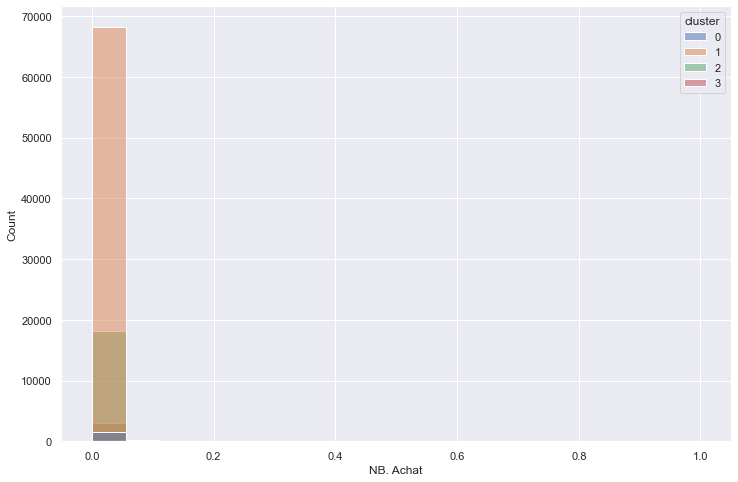

In [122]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=df_std, x="NB. Achat", hue="cluster", palette=sns.color_palette()[:4])

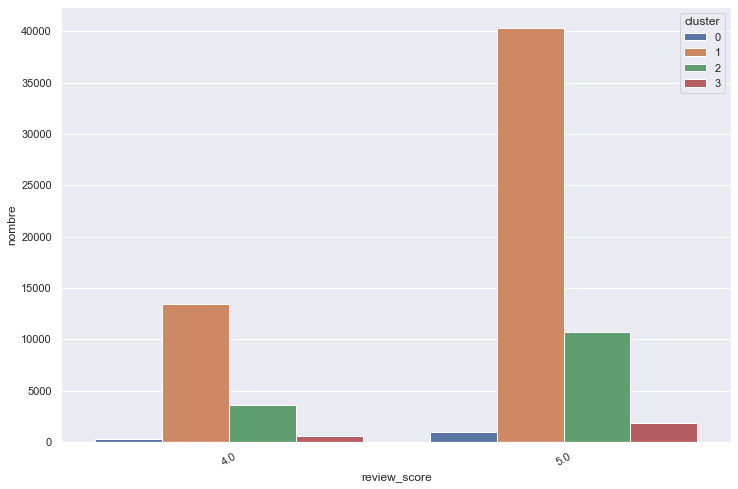

In [123]:
df_plot = df.groupby(["cluster", "review_score"]).size().reset_index(name="nombre").sort_values("nombre", ascending=False).groupby("cluster", sort=False).head(2)
g = sns.barplot(data=df_plot.head(10), x="review_score", y="nombre", hue="cluster", palette=sns.color_palette()[:4])
capture = g.set_xticklabels(g.get_xticklabels(), rotation=30)

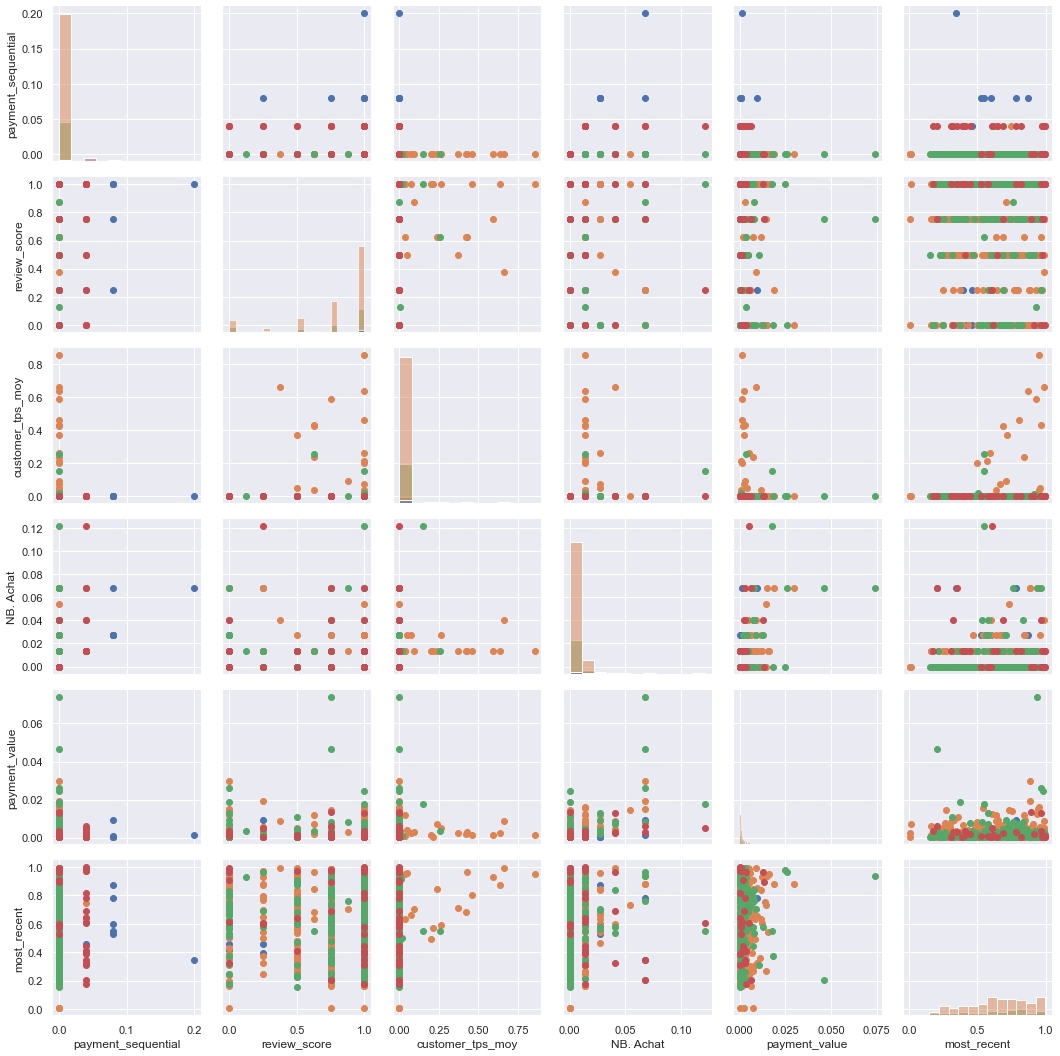

In [124]:
g = sns.PairGrid(df_std.sample(1000).iloc[:, :8], hue="cluster", palette=sns.color_palette()[:4])
g.map_offdiag(plt.scatter)
g.map_diag(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)

In [125]:
(df.groupby("NB. Achat").count().reset_index()["customer_unique_id"] * 100) / df.shape[0]

0     84.984256
1     10.956223
2      2.122146
3      1.006954
4      0.355331
5      0.311598
6      0.072160
7      0.049200
8      0.026240
9      0.026240
10     0.018587
11     0.027333
12     0.004373
13     0.009840
14     0.006560
15     0.001093
16     0.001093
17     0.001093
18     0.003280
19     0.003280
20     0.001093
21     0.007653
22     0.001093
23     0.001093
24     0.001093
25     0.001093
Name: customer_unique_id, dtype: float64